In [23]:
from pymongo import MongoClient
from bson.objectid import ObjectId
import time,datetime
conn = MongoClient()
db = conn.Tracker
collection = [db.james]# db.db2, db.dn2, db.james, db.leo
clean_data = []
for col in collection:
    cursor = col.find({})
    data = [d for d in cursor]
    # print('In',str(col))
    count = 0
    for dic in data:
#         if 'o2_value' and 'hr_value' in dic.keys():
#             if (dic['longitude'] != 0) and (dic['longitude'] != '') and (dic['latitude'] != '') \
#                             and (dic['o2_value'] != '') and (dic['hr_value']!= ''):
        if 'hr_value' in dic.keys():
            if dic['hr_value']  != '' and dic['timestamp'] != 3:
                clean_data.append(dic)

In [30]:
import os 
from datetime import datetime
import numpy as np
import collections
from matplotlib import pyplot as plt
import pandas as pd

In [32]:
# observe data's structure
df = pd.DataFrame(clean_data)
df.head()

,_id,day,hour,hr_value,latitude,longitude,minute,month,o2_value,second,step_value,timestamp,year
0,5c9b3935c4e5a668b7e9be2c,27,16,84,24.94519427,121.37227724,49,3,95,47,0,1.553677e+09,2019
1,5c9b393fc4e5a668b7e9be2e,27,16,84,24.94519427,121.37227724,49,3,95,57,0,1.553677e+09,2019
2,5c9b3949c4e5a668b7e9be30,27,16,84,24.94519427,121.37227724,50,3,95,7,0,1.553677e+09,2019
3,5c9b3953c4e5a668b7e9be32,27,16,84,24.94519427,121.37227724,50,3,95,17,0,1.553677e+09,2019
4,5c9b395dc4e5a668b7e9be34,27,16,79,24.94519427,121.37227724,50,3,98,27,0,1.553677e+09,2019


In [33]:
df.shape

(17639, 13)

In [28]:
lis = []
count = 0
misstime = 0
for i in range(len(clean_data) - 1):
    lis.append(clean_data[i+1]['timestamp'] - clean_data[i]['timestamp'])
    if clean_data[i+1]['timestamp'] - clean_data[i]['timestamp'] > 18:
        misstime += clean_data[i+1]['timestamp'] - clean_data[i]['timestamp']
print
print(max(lis) - min(lis))
print((misstime / 10)/(max(lis) - min(lis)))

2067272.0
0.06369848766877315


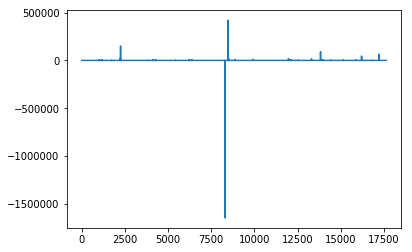

In [27]:
temp = np.array(lis)
plt.plot(range(len(temp)), temp)

In [5]:
float_hr = np.zeros((len(clean_data),1))
float_o2 = np.zeros((len(clean_data),1))
float_timestamp = np.zeros((len(clean_data),1))
# dic = {3:0, 4:1, 5:2, 8:3, 11:4, 12: 5}
for i, line in enumerate(clean_data):
    for j, (key, value) in enumerate(line.items()):
        if key == 'hr_value':
            if value != '':
                float_hr[i,0] = float(value)
            else:
                float_hr[i,0]= 0
        elif key == 'o2_value':
            if value != '':
                float_o2[i,0]=float(value)
            else:
                float_o2[i,0]= 0
        elif key == 'timestamp':
            if value == 3:
                print(i, line)
                print(j,key, value)
            float_timestamp[i,0] = float(value)

In [6]:
np.true_divide(float_hr.sum(), (float_hr!=0).sum() )

83.64067020250724

In [7]:
np.true_divide(float_o2.sum(), (float_o2!=0).sum())

96.82521697203471

In [8]:
(float_hr!=0).sum()

8296

In [9]:
float_hr = float_hr.reshape(float_hr.shape[0],)
np.median(float_hr)

85.0

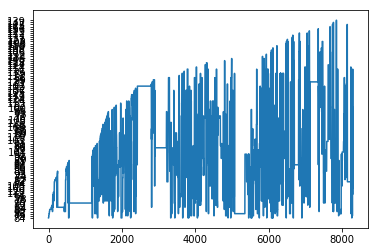

In [10]:
temp = np.array([x['hr_value'] for x in clean_data])
plt.plot(range(len(temp)), temp)

In [11]:
mu, sigma = 60, 20
s = np.random.normal(mu, sigma, 1)

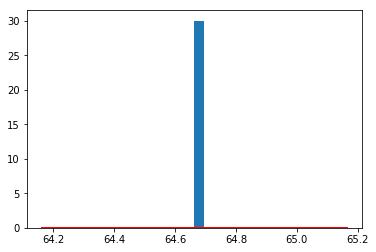

In [13]:
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')
plt.show()

In [14]:
for _ in range(10):
    s = np.random.normal(mu, sigma, 1)
    print(s)

[37.99303133]
[78.64151211]
[91.83876817]
[83.37317337]
[38.56653913]
[52.88110512]
[70.82775975]
[96.5178037]
[61.75498752]
[33.00979535]


In [15]:
mu, sigma = 60, 20
s = np.random.normal(mu, sigma, 1)
# np.true_divide(float_o2.sum(), (float_o2!=0).sum())
lis = list(float_timestamp.reshape(len(float_timestamp),).astype(int))
maxtime = int(max(float_timestamp.reshape(len(float_timestamp),))) 
mintime = int(min(float_timestamp.reshape(len(float_timestamp),)))
count = 0
# print((maxtime - mintime) / 10)
# print(len(float_timestamp))
for i in range(mintime,maxtime,10):
    if i in list(lis):
        count += 1# too slow
print(count, len(lis))

KeyboardInterrupt: 

In [16]:
timest = float_timestamp.reshape(len(float_timestamp),)

In [17]:
timediff = np.diff(timest)

In [18]:
count = 0
for x in timediff:
    if x > 10:
        count += 1

In [19]:
np.argwhere(timediff > 600)

array([[ 919],
       [ 933],
       [ 997],
       [ 999],
       [1002],
       [1009],
       [1031],
       [1034],
       [1048],
       [1176],
       [1734],
       [2202],
       [2247],
       [3865],
       [4099],
       [4101],
       [4132],
       [4133],
       [4134],
       [4140],
       [4142],
       [4145],
       [4146],
       [4149],
       [4150],
       [4151],
       [4297],
       [5426],
       [6124],
       [6219],
       [6352],
       [6361],
       [6362],
       [6365],
       [6366],
       [6367],
       [6368],
       [6371]])

In [20]:
float_timestamp[173] - float_timestamp[172]

array([119.])